## PREDIKSI LOAN

x= Jumlah tanggungan, pendidikan, pekerjaan, pendapatan, jumlah yang pengen dipinjam, jangka waktu peminjaman, nilai kreditnya, nilai aset

y: loans_status

# Preparation

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## GET DATA

In [2]:
df = pd.read_csv('loan_data_set.csv')

#EDA

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
df.shape

(592, 13)

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Visualisasi untuk data train

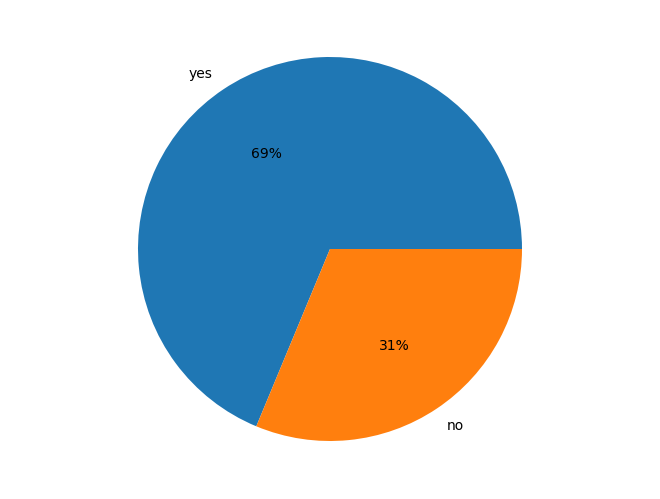

In [19]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
labels=['yes','no']
y=df.Loan_Status.value_counts()
ax.pie(y, labels=labels, autopct='%.0f%%')
plt.show()

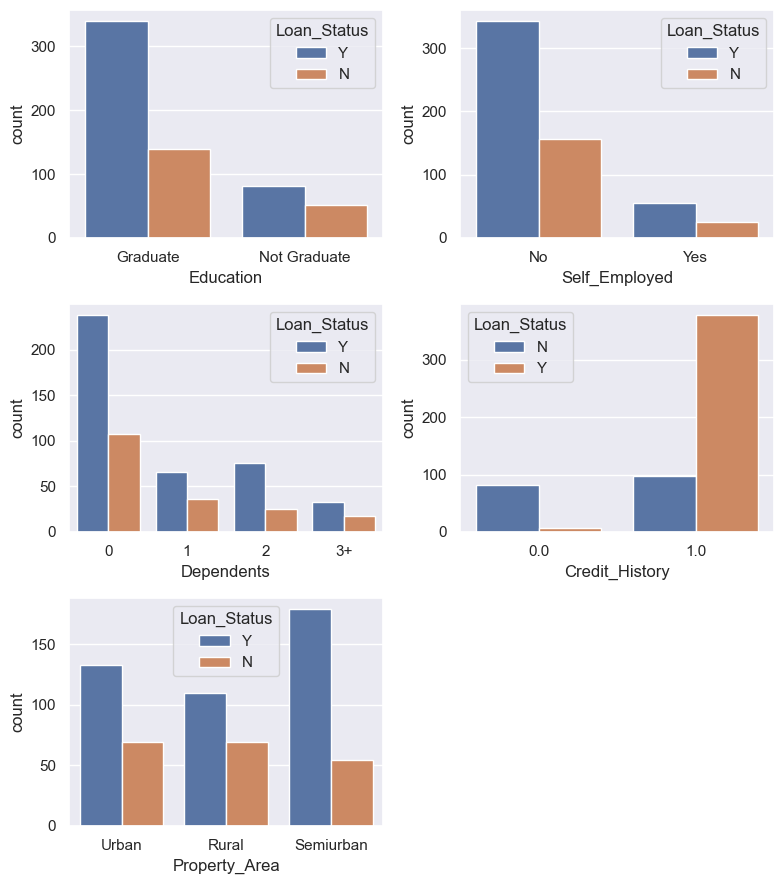

In [20]:
#membuat plot secara bivariat

sns.set(style='darkgrid')
fig,ax=plt.subplots(3,2 , figsize=(8,9))
sns.countplot(data=df, x='Education', hue='Loan_Status', ax=ax[0, 0])
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status', ax=ax[0, 1])
sns.countplot(data=df, x='Dependents', hue='Loan_Status', ax=ax[1, 0])
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', ax=ax[1, 1])
sns.countplot(data=df, x='Property_Area', hue='Loan_Status', ax=ax[2, 0])

# Menghapus subplot kosong terakhir
fig.delaxes(ax[2, 1])

plt.tight_layout()

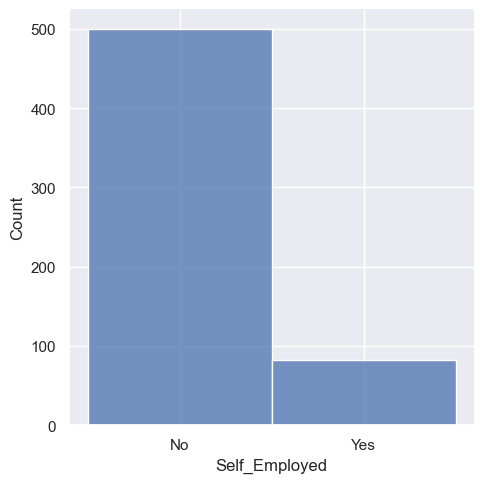

In [21]:
sns.displot(df.Self_Employed)

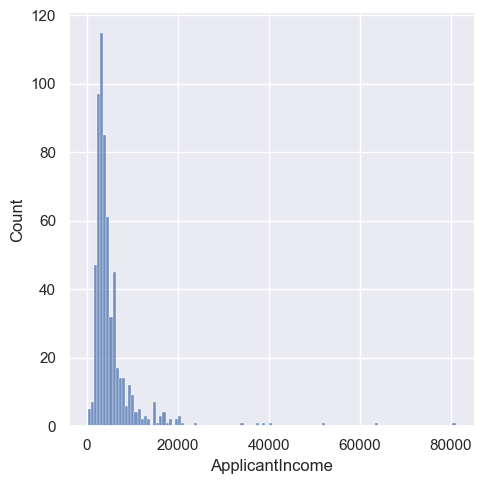

In [22]:
sns.displot(df.ApplicantIncome)

In [23]:
df['ApplicantIncome'].nlargest(5)

409    81000
333    63337
171    51763
155    39999
185    39147
Name: ApplicantIncome, dtype: int64

In [12]:
#Mengurangi data ApplicatiIncome
df.drop(df[df['ApplicantIncome'] >=   63337].index, inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df['CoapplicantIncome'].nlargest(3)

600    41667.0
581    33837.0
402    20000.0
Name: CoapplicantIncome, dtype: float64

In [14]:
df.drop(df[df['CoapplicantIncome'] >=  33837.0].index, inplace=True)

In [15]:
df['Loan_Amount_Term'].nlargest(10)

75     480.0
109    480.0
130    480.0
168    480.0
179    480.0
228    480.0
248    480.0
293    480.0
298    480.0
358    480.0
Name: Loan_Amount_Term, dtype: float64

In [16]:
df.drop(df[df['Loan_Amount_Term'] >=  480.0].index, inplace=True)

In [17]:
df['LoanAmount'].nlargest(5)

171    700.0
155    600.0
561    600.0
369    570.0
487    500.0
Name: LoanAmount, dtype: float64

In [18]:
df.drop(df[df['LoanAmount'] >=  600.0].index, inplace=True)

#Visualisasi data test

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
# Mengubah data -1 menjadi nan
df['LoanAmount'].replace(-1, np.nan, inplace=True)
print(df['LoanAmount'])


0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 592, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_14468\1543138764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].replace(-1, np.nan, inplace=True)


In [21]:
# Mengganti nilai yang memiliki tanda '+' atau '-' di belakang angka dengan NaN
df['Dependents'] = df['Dependents'].replace(to_replace=r'^\d+[+-]$', value=np.nan, regex=True)
print(df['Dependents'])

0        0
1        1
2        0
3        0
4        0
      ... 
609      0
610    NaN
611      1
612      2
613      0
Name: Dependents, Length: 592, dtype: object


In [22]:
# Menghapus baris yang mengandung nilai NaN
cleaned = df.dropna(subset=['LoanAmount'])
print(cleaned['LoanAmount'])


1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 570, dtype: float64


In [23]:
cleaned = df.dropna(subset=['Dependents'])
print(cleaned['Dependents'])

0      0
1      1
2      0
3      0
4      0
      ..
608    0
609    0
611    1
612    2
613    0
Name: Dependents, Length: 533, dtype: object


In [24]:
cleaned_new=cleaned.drop(columns=['Loan_ID'],axis=1)
cleaned_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
df_cleaned = cleaned_new.dropna()

In [26]:
df_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
df_cleaned.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
#Mengubah data yang ada
label_encoder = LabelEncoder()
df_cleaned['Gender']= label_encoder.fit_transform(df_cleaned['Gender'])
df_cleaned['Married']= label_encoder.fit_transform(df_cleaned['Married'])
df_cleaned['Self_Employed']= label_encoder.fit_transform(df_cleaned['Self_Employed'])
df_cleaned['Credit_History']= label_encoder.fit_transform(df_cleaned['Credit_History'])
df_cleaned['Gender']= label_encoder.fit_transform(df_cleaned['Gender'])
df_cleaned['Loan_Status']= label_encoder.fit_transform(df_cleaned['Loan_Status'])
df_cleaned['Education']= label_encoder.fit_transform(df_cleaned['Education'])
df_cleaned['Property_Area']= label_encoder.fit_transform(df_cleaned['Property_Area'])
df_cleaned

C:\Users\acer\AppData\Local\Temp\ipykernel_14468\1647178690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender']= label_encoder.fit_transform(df_cleaned['Gender'])
C:\Users\acer\AppData\Local\Temp\ipykernel_14468\1647178690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Married']= label_encoder.fit_transform(df_cleaned['Married'])
C:\Users\acer\AppData\Local\Temp\ipykernel_14468\1647178690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1,0,1
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [30]:
# Mengubah data tipe float menjadi integer
df_cleaned['LoanAmount'] = df_cleaned['LoanAmount'].astype(int)
df_cleaned['Loan_Amount_Term'] = df_cleaned['Loan_Amount_Term'].astype(int)
df_cleaned['Credit_History'] = df_cleaned['Credit_History'].astype(int)
df_cleaned['CoapplicantIncome'] = df_cleaned['CoapplicantIncome'].astype(int)
df_cleaned


C:\Users\acer\AppData\Local\Temp\ipykernel_14468\3516388514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LoanAmount'] = df_cleaned['LoanAmount'].astype(int)
C:\Users\acer\AppData\Local\Temp\ipykernel_14468\3516388514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Loan_Amount_Term'] = df_cleaned['Loan_Amount_Term'].astype(int)
C:\Users\acer\AppData\Local\Temp\ipykernel_14468\3516388514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
5,1,1,2,0,1,5417,4196,267,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950,108,360,1,0,1
609,0,0,0,0,0,2900,0,71,360,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


In [31]:
df_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
5,1,1,2,0,1,5417,4196,267,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950,108,360,1,0,1
609,0,0,0,0,0,2900,0,71,360,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


**Preprocessing data test**

In [32]:
# Konversi kolom 'Loan_Amount_Term' dari hari ke bulan
df_cleaned['Loan_Amount_Term'] = df_cleaned['Loan_Amount_Term'] / 30
df_cleaned

C:\Users\acer\AppData\Local\Temp\ipykernel_14468\3977888989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Loan_Amount_Term'] = df_cleaned['Loan_Amount_Term'] / 30


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508,128,12.0,1,0,0
2,1,1,0,0,1,3000,0,66,12.0,1,2,1
3,1,1,0,1,0,2583,2358,120,12.0,1,2,1
4,1,0,0,0,0,6000,0,141,12.0,1,2,1
5,1,1,2,0,1,5417,4196,267,12.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950,108,12.0,1,0,1
609,0,0,0,0,0,2900,0,71,12.0,1,0,1
611,1,1,1,0,0,8072,240,253,12.0,1,2,1
612,1,1,2,0,0,7583,0,187,12.0,1,2,1


In [33]:
df_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508,128,12.0,1,0,0
2,1,1,0,0,1,3000,0,66,12.0,1,2,1
3,1,1,0,1,0,2583,2358,120,12.0,1,2,1
4,1,0,0,0,0,6000,0,141,12.0,1,2,1
5,1,1,2,0,1,5417,4196,267,12.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950,108,12.0,1,0,1
609,0,0,0,0,0,2900,0,71,12.0,1,0,1
611,1,1,1,0,0,8072,240,253,12.0,1,2,1
612,1,1,2,0,0,7583,0,187,12.0,1,2,1


In [34]:
df_cleaned['Loan_Amount_Term'] = df_cleaned['Loan_Amount_Term'].astype(int)

C:\Users\acer\AppData\Local\Temp\ipykernel_14468\767891428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Loan_Amount_Term'] = df_cleaned['Loan_Amount_Term'].astype(int)


In [35]:
df_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508,128,12,1,0,0
2,1,1,0,0,1,3000,0,66,12,1,2,1
3,1,1,0,1,0,2583,2358,120,12,1,2,1
4,1,0,0,0,0,6000,0,141,12,1,2,1
5,1,1,2,0,1,5417,4196,267,12,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950,108,12,1,0,1
609,0,0,0,0,0,2900,0,71,12,1,0,1
611,1,1,1,0,0,8072,240,253,12,1,2,1
612,1,1,2,0,0,7583,0,187,12,1,2,1


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             426 non-null    int64 
 1   Married            426 non-null    int32 
 2   Dependents         426 non-null    object
 3   Education          426 non-null    int32 
 4   Self_Employed      426 non-null    int32 
 5   ApplicantIncome    426 non-null    int64 
 6   CoapplicantIncome  426 non-null    int32 
 7   LoanAmount         426 non-null    int32 
 8   Loan_Amount_Term   426 non-null    int32 
 9   Credit_History     426 non-null    int32 
 10  Property_Area      426 non-null    int32 
 11  Loan_Status        426 non-null    int32 
dtypes: int32(9), int64(2), object(1)
memory usage: 28.3+ KB


# Model Training

In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# mendefinisikan features (X) and the target (y)
X = df_cleaned.drop('Loan_Status', axis=1)
y = df_cleaned['Loan_Status']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_test_res, y_test_res = smote.fit_resample(X_test, y_test)
# Menampilkan informasi tentang data latih
print("Jumlah baris dan kolom data latih (X_train):", X_train.shape)
print("Jumlah baris data latih (y_train):", y_train.shape)


# Menampilkan informasi tentang data uji
print("\nJumlah baris dan kolom data uji (X_test):", X_test.shape)
print("Jumlah baris data uji (y_test):", y_test.shape)


Jumlah baris dan kolom data latih (X_train): (298, 12)
Jumlah baris data latih (y_train): (298,)

Jumlah baris dan kolom data uji (X_test): (128, 12)
Jumlah baris data uji (y_test): (128,)


## Logistik Regresion

In [78]:
# Membuat model
log_model = LogisticRegression(max_iter=1000)

# Melatih model dengan data yang telah diimputasi
log_model.fit(X_train_res, y_train_res)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Random Forest

In [79]:
rand_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rand_model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, random_state=42)

# SVM

In [55]:
SV_model = SVC(kernel='sigmoid')
SV_model .fit(X_train_res,y_train_res)

SVC(kernel='sigmoid')

# Gradien Bost

In [80]:
gb_model = GradientBoostingClassifier(n_estimators=100)

# Melatih model Gradient Boosting menggunakan data pelatihan
gb_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

# Decision Tree

In [81]:

clf = DecisionTreeClassifier(class_weight='balanced', max_depth=1)


clf.fit(X_train_res,y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=1)

# Evaluasi Model

# Logistic Regression

In [82]:
#Mengevaluasi data train Logistic regression
y_train_pred = log_model.predict(X_train_res)

#Membuat Laporan Matriks kebingungan
print('Laporan Confusion Model Evaluation Logic Regression: ')
print(confusion_matrix(y_train_res,y_train_pred))

#Membuat Laporan Klasifikasi Model
print('\nLaporan Klasifikasi Model Evaluation Logic Regression: ')
print(classification_report(y_train_res,y_train_pred))

Laporan Confusion Model Evaluation Logic Regression: 
[[151  61]
 [ 19 193]]

Laporan Klasifikasi Model Evaluation Logic Regression: 
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       212
           1       0.76      0.91      0.83       212

    accuracy                           0.81       424
   macro avg       0.82      0.81      0.81       424
weighted avg       0.82      0.81      0.81       424



In [83]:
#Mengevaluasi model data test Logistic regression
y_test_pred = log_model.predict(X_test_res)

#Membuat laporan matriks kebingungan
print('Laporan Klasifikasi Model Evaluation Logic Regression: ')
print(confusion_matrix(y_test_res,y_test_pred))

#Membuat Laporan klasifikasi Model
print('\nLaporan Klasifikasi Model Evaluation Logic Regression: ')
print(classification_report(y_test_res,y_test_pred))

Laporan Klasifikasi Model Evaluation Logic Regression: 
[[64 24]
 [11 77]]

Laporan Klasifikasi Model Evaluation Logic Regression: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        88
           1       0.76      0.88      0.81        88

    accuracy                           0.80       176
   macro avg       0.81      0.80      0.80       176
weighted avg       0.81      0.80      0.80       176



# Random Forest

In [84]:
#menampilkan hasil training random forest
y_train_pred = rand_model.predict(X_train_res)

#Laporan confusion Matrix
print('Laporan Klasifikasi Training Model Evaluation Random Forest: ')
print(confusion_matrix(y_train_res,y_train_pred))

#Laporan klasifikasi
print('\nLaporan Klasifikasi Training Model Evaluation Random Forest: ')
print(classification_report(y_train_res,y_train_pred))

Laporan Klasifikasi Training Model Evaluation Random Forest: 
[[205   7]
 [  0 212]]

Laporan Klasifikasi Training Model Evaluation Random Forest: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       212
           1       0.97      1.00      0.98       212

    accuracy                           0.98       424
   macro avg       0.98      0.98      0.98       424
weighted avg       0.98      0.98      0.98       424



In [85]:
#menampilkan hasil data Test random forest
y_test_pred = rand_model.predict(X_test_res)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation Random Forest: ')
print(confusion_matrix(y_test_res,y_test_pred))

#Laporan classification Report
print('\nLaporan Klasifikasi Test Model Evaluation Random Forest: ')
print(classification_report(y_test_res,y_test_pred))

Laporan Klasifikasi Test Model Evaluation Random Forest: 
[[62 26]
 [ 8 80]]

Laporan Klasifikasi Test Model Evaluation Random Forest: 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        88
           1       0.75      0.91      0.82        88

    accuracy                           0.81       176
   macro avg       0.82      0.81      0.80       176
weighted avg       0.82      0.81      0.80       176



# gb

In [86]:
#Mengevaluasi SVM
y_train_pred =gb_model.predict(X_train_res)

#Laporan confusion Matrix
print('Laporan Klasifikasi Train Model Evaluation GB: ')
print(confusion_matrix(y_train_res,y_train_pred))

#Laporan Klasifikasi
print('\nLaporan Klasifikasi Model Evaluation GB: ')
print(classification_report(y_train_res,y_train_pred))

Laporan Klasifikasi Train Model Evaluation GB: 
[[197  15]
 [  1 211]]

Laporan Klasifikasi Model Evaluation GB: 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       212
           1       0.93      1.00      0.96       212

    accuracy                           0.96       424
   macro avg       0.96      0.96      0.96       424
weighted avg       0.96      0.96      0.96       424



In [87]:
#Mengevaluasi SVM
y_test_pred =gb_model.predict(X_test_res)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation GB: ')
print(confusion_matrix(y_test_res,y_test_pred))

#Laporan Klasifikasi Model SVM
print('\nLaporan Klasifikasi Model Evaluation GB: ')
print(classification_report(y_test_res,y_test_pred))

Laporan Klasifikasi Test Model Evaluation GB: 
[[66 22]
 [12 76]]

Laporan Klasifikasi Model Evaluation GB: 
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        88
           1       0.78      0.86      0.82        88

    accuracy                           0.81       176
   macro avg       0.81      0.81      0.81       176
weighted avg       0.81      0.81      0.81       176



# Decision TREE

In [88]:
#Mengevaluasi SVM
y_train_pred =clf.predict(X_train_res)

#Laporan confusion Matrix
print('Laporan Klasifikasi Train Model Evaluation Descision Tree: ')
print(confusion_matrix(y_train_res,y_train_pred))

#Laporan Klasifikasi
print('\nLaporan Klasifikasi Model Evaluation Desicion Tree: ')
print(classification_report(y_train_res,y_train_pred))

Laporan Klasifikasi Train Model Evaluation Descision Tree: 
[[112 100]
 [  2 210]]

Laporan Klasifikasi Model Evaluation Desicion Tree: 
              precision    recall  f1-score   support

           0       0.98      0.53      0.69       212
           1       0.68      0.99      0.80       212

    accuracy                           0.76       424
   macro avg       0.83      0.76      0.75       424
weighted avg       0.83      0.76      0.75       424



In [89]:
#Mengevaluasi SVM
y_test_pred =clf.predict(X_test_res)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation Desicion tree: ')
print(confusion_matrix(y_test_res,y_test_pred))

#Laporan Klasifikasi Model SVM
print('\nLaporan Klasifikasi Model Evaluation Decision tree: ')
print(classification_report(y_test_res,y_test_pred))

Laporan Klasifikasi Test Model Evaluation Desicion tree: 
[[56 32]
 [ 3 85]]

Laporan Klasifikasi Model Evaluation Decision tree: 
              precision    recall  f1-score   support

           0       0.95      0.64      0.76        88
           1       0.73      0.97      0.83        88

    accuracy                           0.80       176
   macro avg       0.84      0.80      0.80       176
weighted avg       0.84      0.80      0.80       176



# Model Selection

In [90]:
from sklearn.model_selection import cross_val_score
# Cross-validation untuk Logistic Regression
log_reg_cv_scores = cross_val_score(log_model, X_train_res, y_train_res, cv=5)
log_reg_mean_cv_score = log_reg_cv_scores.mean()

# Cross-validation untuk Random Forest
rf_cv_scores = cross_val_score(rand_model,X_train_res, y_train_res, cv=5)
rf_mean_cv_score = rf_cv_scores.mean()

# Cross-validation untuk SVM
sv_cv_scores = cross_val_score(clf, X_train_res, y_train_res, cv=5)
sv_mean_cv_score = sv_cv_scores.mean()

# Cross-validation untuk Gradient Boosting
gb_cv_scores = cross_val_score(gb_model,X_train_res, y_train_res, cv=5)
gb_mean_cv_score = gb_cv_scores.mean()

# Cetak hasil
print("Cross-validation scores for Logistic Regression:", log_reg_cv_scores)
print("Mean Cross-validation score for Logistic Regression:", log_reg_mean_cv_score)
print("Cross-validation scores for Random Forest:", rf_cv_scores)
print("Mean Cross-validation score for Random Forest:", rf_mean_cv_score)
print("Cross-validation scores for Random Forest:", sv_cv_scores)
print("Mean Cross-validation score for Random Forest:", sv_mean_cv_score)
print("Cross-validation scores for Gradient Boosting:", gb_cv_scores)
print("Mean Cross-validation score for Gradient Boosting:", gb_mean_cv_score)

# Bandingkan hasil
if gb_mean_cv_score > log_reg_mean_cv_score and gb_mean_cv_score > rf_mean_cv_score:
    print("Gradient Boosting memiliki rata-rata Cross-validation score yang lebih tinggi.")
elif log_reg_mean_cv_score > rf_mean_cv_score and log_reg_mean_cv_score > sv_mean_cv_score:
    print("Regresi Logistik memiliki rata-rata Cross-validation score yang lebih tinggi.")
elif rf_mean_cv_score > sv_mean_cv_score:
    print("Random Forest memiliki rata-rata Cross-validation score yang lebih tinggi.")
else:
    print("Support Vector Machine memiliki rata-rata Cross-validation score yang lebih tinggi.")


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Cross-validation scores for Logistic Regression: [0.64705882 0.67058824 0.89411765 0.81176471 0.94047619]
Mean Cross-validation score for Logistic Regression: 0.7928011204481793
Cross-validation scores for Random Forest: [0.76470588 0.69411765 0.91764706 0.90588235 0.9047619 ]
Mean Cross-validation score for Random Forest: 0.8374229691876751
Cross-validation scores for Random Forest: [0.65882353 0.71764706 0.81176471 0.77647059 0.83333333]
Mean Cross-validation score for Random Forest: 0.7596078431372549
Cross-validation scores for Gradient Boosting: [0.70588235 0.64705882 0.91764706 0.89411765 0.91666667]
Mean Cross-validation score for Gradient Boosting: 0.8162745098039215
Random Forest memiliki rata-rata Cross-validation score yang lebih tinggi.


In [91]:
# Cross-validation untuk Logistic Regression
log_reg_cv_scores = cross_val_score(log_model, X_test_res, y_test_res, cv=5)
log_reg_mean_cv_score = log_reg_cv_scores.mean()

# Cross-validation untuk Random Forest
rf_cv_scores = cross_val_score(rand_model,  X_test_res, y_test_res, cv=5)
rf_mean_cv_score = rf_cv_scores.mean()

# Cross-validation untuk SVM
sv_cv_scores = cross_val_score(clf, X_test_res, y_test_res, cv=5)
sv_mean_cv_score = sv_cv_scores.mean()

# Cross-validation untuk Gradient Boosting
gb_cv_scores = cross_val_score(gb_model, X_test_res, y_test_res,cv=5)
gb_mean_cv_score = gb_cv_scores.mean()

# Cetak hasil
print("Cross-validation scores for Logistic Regression:", log_reg_cv_scores)
print("Mean Cross-validation score for Logistic Regression:", log_reg_mean_cv_score)
print("Cross-validation scores for Random Forest:", rf_cv_scores)
print("Mean Cross-validation score for Random Forest:", rf_mean_cv_score)
print("Cross-validation scores for SVM:", sv_cv_scores)
print("Mean Cross-validation score for SVM:", sv_mean_cv_score)
print("Cross-validation scores for Gradient Boosting:", gb_cv_scores)
print("Mean Cross-validation score for Gradient Boosting:", gb_mean_cv_score)

# Bandingkan hasil
if gb_mean_cv_score > log_reg_mean_cv_score and gb_mean_cv_score > rf_mean_cv_score:
    print("Gradient Boosting memiliki rata-rata Cross-validation score yang lebih tinggi.")
elif log_reg_mean_cv_score > rf_mean_cv_score and log_reg_mean_cv_score > sv_mean_cv_score:
    print("Regresi Logistik memiliki rata-rata Cross-validation score yang lebih tinggi.")
elif rf_mean_cv_score > sv_mean_cv_score:
    print("Random Forest memiliki rata-rata Cross-validation score yang lebih tinggi.")
else:
    print("Support Vector Machine memiliki rata-rata Cross-validation score yang lebih tinggi.")


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Cross-validation scores for Logistic Regression: [0.80555556 0.77142857 0.8        0.88571429 0.85714286]
Mean Cross-validation score for Logistic Regression: 0.823968253968254
Cross-validation scores for Random Forest: [0.80555556 0.74285714 0.8        0.91428571 0.82857143]
Mean Cross-validation score for Random Forest: 0.8182539682539682
Cross-validation scores for SVM: [0.77777778 0.68571429 0.82857143 0.88571429 0.82857143]
Mean Cross-validation score for SVM: 0.8012698412698412
Cross-validation scores for Gradient Boosting: [0.83333333 0.71428571 0.82857143 0.94285714 0.88571429]
Mean Cross-validation score for Gradient Boosting: 0.8409523809523808
Gradient Boosting memiliki rata-rata Cross-validation score yang lebih tinggi.


# save Model

In [93]:

import pickle
# Simpan model yang sudah dilatih
with open('gb.pkl', 'wb') as f:
    pickle.dump(gb_model, f)




In [ ]:
import pickle

# Memuat model yang disimpan sebelumnya
with open('rand_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model dimuat dari file rand_model.pkl")


Model dimuat dari file rand_model.pkl


In [ ]:
# Menyiapkan data
X_new = {
    'Gender': [1],  # Sesuaikan dengan hasil encoding
    'Married': [1],  # Sesuaikan dengan hasil encoding
    'Dependents': [0],  # Sesuaikan dengan hasil encoding
    'Education': [1],  # Sesuaikan dengan hasil encoding
    'Self_Employed': [0],  # Sesuaikan dengan hasil encoding
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000.0],
    'LoanAmount': [150.0],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [1.0],
    'Property_Area': [2]  # Sesuaikan dengan hasil encoding
}

# Mengubah data dari dictionary menjadi array
X_new_array = np.array([[value[0] for value in X_new.values()]])

# Membuat prediksi menggunakan model yang dimuat
predictions = loaded_model.predict(X_new_array)

# Menampilkan hasil prediksi
if predictions[0] != 0:
    print("Status pinjaman : Tidak gagal bayar")
else:
    print("Status Pinjaman : Gagal Bayar")

Status pinjaman : Tidak gagal bayar


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Menyiapkan data
X_new = {
    'Gender': [1],  # Sesuaikan dengan hasil encoding
    'Married': [1],  # Sesuaikan dengan hasil encoding
    'Dependents': [7],  # Sesuaikan dengan hasil encoding
    'Education': [1],  # Sesuaikan dengan hasil encoding
    'Self_Employed': [0],  # Sesuaikan dengan hasil encoding
    'ApplicantIncome': [500],
    'CoapplicantIncome': [200.0],
    'LoanAmount': [150.0],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [1.0],
    'Property_Area': [0]  # Sesuaikan dengan hasil encoding
}

# Mengubah data dari dictionary menjadi array
X_new_array = np.array([[value[0] for value in X_new.values()]])

# Membuat prediksi menggunakan model yang dimuat
predictions = loaded_model.predict(X_new_array)

# Menampilkan hasil prediksi
if predictions[0] != 0:
    print("Status pinjaman : Tidak gagal bayar")
else:
    print("Status Pinjaman : Gagal Bayar")

Status Pinjaman : Gagal Bayar


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
